In [4]:
import polars as pl
from plotnine import *
from statsmodels.tsa.seasonal import STL

In [6]:
df = pl.read_csv("../../Data/U.csv", try_parse_dates=True)
df

date,U
date,f64
2000-01-01,9.5
2000-02-01,9.7
2000-03-01,9.5
2000-04-01,9.2
2000-05-01,8.9
…,…
2024-11-01,6.1
2024-12-01,6.2
2025-01-01,6.5


In [7]:
stl = STL(df['U'], period = 12).fit()

In [8]:
df = (
    df
    .with_columns(
        Trend = stl.trend,
        Seasonal = stl.seasonal,
        Residual = stl.resid
    )
    .with_columns(
        U_sa = pl.col('U') - pl.col('Seasonal')
    )
)
df

date,U,Trend,Seasonal,Residual,U_sa
date,f64,f64,f64,f64,f64
2000-01-01,9.5,9.330977,0.123647,0.045376,9.376353
2000-02-01,9.7,9.261213,0.40428,0.034508,9.29572
2000-03-01,9.5,9.191866,0.296824,0.01131,9.203176
2000-04-01,9.2,9.122956,0.069979,0.007065,9.130021
2000-05-01,8.9,9.054496,-0.150211,-0.004285,9.050211
…,…,…,…,…,…
2024-11-01,6.1,6.228019,-0.051914,-0.076105,6.151914
2024-12-01,6.2,6.198625,-0.007802,0.009177,6.207802
2025-01-01,6.5,6.168962,0.333973,-0.002936,6.166027


In [9]:
df_long = (
    df
    .unpivot(index = 'date', value_name='vals', variable_name='variables')
)
df_long

date,variables,vals
date,str,f64
2000-01-01,"""U""",9.5
2000-02-01,"""U""",9.7
2000-03-01,"""U""",9.5
2000-04-01,"""U""",9.2
2000-05-01,"""U""",8.9
…,…,…
2024-11-01,"""U_sa""",6.151914
2024-12-01,"""U_sa""",6.207802
2025-01-01,"""U_sa""",6.166027


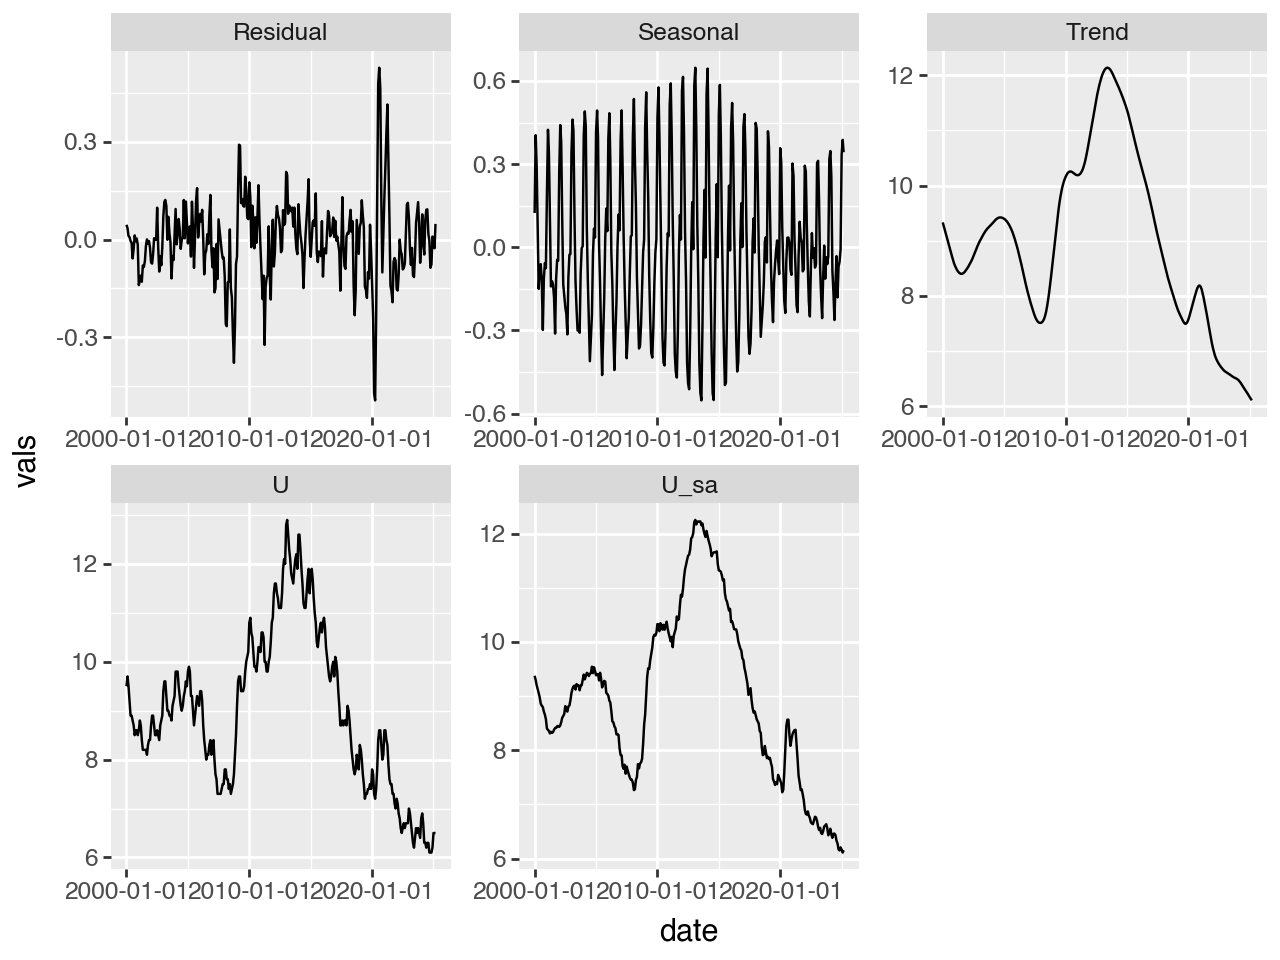

In [10]:
(
    ggplot(data=df_long, mapping=aes(x = 'date', y = 'vals')) +
    geom_line() +
    facet_wrap(facets='variables', scales='free')
)